In [1]:
import sys
import random

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

from datetime import date
from sklearn.cluster import KMeans

%matplotlib inline

# Model

In [2]:
def load_data(filename):
    """
    Loads given file as pandas dataframe.
    
    Argument:
        filename: string, name of file
        
    Return:
        pandas dataframe
    """
    return pd.read_csv(filename)

In [27]:
def gen_pool():

    file_id = random.randint(0, 999)
    filename = "./Songs_features/songs" + str(file_id) + ".csv"
    songs = load_data(filename)
    
    today = date(2019,11,19)
    songs["release_day"] = pd.to_datetime(songs["release_date"], format='%Y-%m-%d', errors='coerce')
    songs["release_day"] = today - songs["release_day"].dt.date.values
    songs["release_day"] = [x.days for x in songs["release_day"]] 
    del songs["release_date"]
    
    return songs

In [4]:
def train(df, n_clusters, min_clusters=2, m=3):
    """
    Trains the model using KMeans.
    
    Argument:
        df: dataframe, song pool
        n_clusters: int, number of clusters
        
    Return:
        pandas dataframe, kmeans cluster labels
    """
    n_clusters = random.randint(n_clusters - m, n_clusters + m)
    if n_clusters < min_clusters:
        n_clusters = min_clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    kmeans.fit(df)
    return kmeans.labels_

In [9]:
def gen_playlist(df, min_features, max_features, m, divisor=10000):
    """
    Generates playlists using our algorithm.
    
    Argument:
        df: dataframe, song pool
        min_features: string, minimizing feature
        max_features: string, maximizing feature
        m: int, number of songs to choose
        
    Return:
        pandas dataframe, kmeans cluster labels
    """
    n_clusters = int(len(df)/divisor)
    if n_clusters > 6:
        n_clusters = 6
    
    best_score = -sys.maxsize - 1
    best_playlist = []
    
    df = df.dropna()
    
    for i in range(1):
        #print(str(i) + "-th run...")
        output = train(df, n_clusters)
        df.loc[:, "clusters"] = output
        playlists = df.sort_values([max_features],ascending=False).groupby("clusters").head(m)
        lo_score = playlists.groupby("clusters")[min_features].agg("mean")
        hi_score = playlists.groupby("clusters")[max_features].agg("mean")
        score = hi_score - lo_score
        if best_score < score.max():
            best_score = score.max()
            best_playlist = playlists[playlists["clusters"] == score.idxmax()]
    
    return best_playlist, best_score

In [10]:
def calc_score(data, min_features, max_features):
    hi_score = data.groupby("pid")[max_features].agg("mean")
    lo_score = data.groupby("pid")[min_features].agg("mean")
    score = hi_score - lo_score
    return len(data[data["pid"] == score.idxmax()]), score.max()

In [68]:
def evaluate_model(n, params=["danceability", "instrumentalness", "valence", "liveness"],
                   all_params=["duration_ms", "danceability", "acousticness", "energy", "key", "mode", "instrumentalness", "liveness", "valence", "tempo", "popularity", "release_day"]):
    spotify_scores = []
    minmax_scores = []
    pairs = []
    for k in range(n):
        songs = gen_pool()
        data = songs.drop_duplicates(subset=["track_uri"])
        data = data[all_params]
    
        i = random.randint(1, len(params)-1)
        j = random.randint(1, len(params)-1)
         
        if len(params) == 2:
            i = 0
            j = 1
            
        while j == i:
            j = random.randint(1, len(params)-1)
        
        m, score = calc_score(songs, params[i], params[j])
        spotify_scores.append(score)

        _, score = gen_playlist(data, params[i], params[j], m)
        minmax_scores.append(score)
        
        pairs.append((params[i], params[j]))
    
    return spotify_scores, minmax_scores, pairs

In [63]:
spotify_scores, minmax_scores, pairs = evaluate_model(100)

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

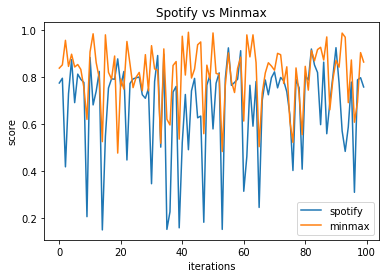

In [64]:
plt.plot(np.arange(len(spotify_scores)), spotify_scores, label="spotify")
plt.plot(np.arange(len(minmax_scores)), minmax_scores, label="minmax")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("score")
plt.title("Spotify vs Minmax")
plt.savefig("figures/performance.png")

In [69]:
spotify_scores, minmax_scores, pairs = evaluate_model(100, params=["acousticness", "instrumentalness"])

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/seoyoung.kyung/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

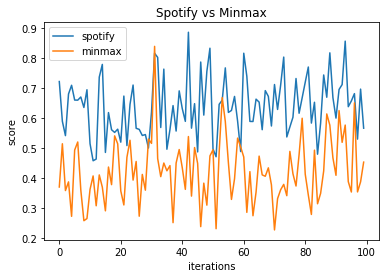

In [70]:
plt.plot(np.arange(len(spotify_scores)), spotify_scores, label="spotify")
plt.plot(np.arange(len(minmax_scores)), minmax_scores, label="minmax")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("score")
plt.title("Spotify vs Minmax")
plt.savefig("figures/performance_correlated.png")

# Initial Test

In [11]:
best_playlist, best_score = gen_playlist(data, "acousticness", "danceability", len(spotify_playlist))

0-th run...
1-th run...
2-th run...
3-th run...
4-th run...
5-th run...
6-th run...
7-th run...
8-th run...
9-th run...


In [12]:
songs[songs.index.isin(best_playlist.index)][["track_name", "artist_name", "album_name"]]

,track_name,artist_name,album_name
8285,Around The World,Daft Punk,Homework
9439,You And I - Deadmau5 Remix,Medina,Welcome To Medina
16982,Your Ad Here,deadmau5,We Are Friends.
20366,Candy Licker,Marvin Sease,Marvin Sease
24299,If Only Alarms Didn't Ring - feat. Nina Zeitli...,Biboulakis,If Only Alarms Didn't Ring (feat. Nina Zeitlin)
31291,Fantastic Voyage (Singalong Version),70s Music All Stars,70s Hits Singalong
33572,Dangerous,Michael Jackson,Dangerous
45196,Animal Rights,deadmau5,4x4=12
45886,You Wanted A Hit,LCD Soundsystem,This Is Happening
47776,Flashback,Fat Freddy's Drop,Based on a True Story


In [15]:
spotify_playlist

,track_name,artist_name,album_name
113,"Love Come Down (12"" Version) - Remastered","Evelyn ""Champagne"" King","The Essential Evelyn ""Champagne"" King"
114,I Wonder If I Take You Home,Lisa Lisa & Cult Jam,Playlist: The Very Best Of Lisa Lisa & Cult Jam
115,Every Little Step,Bobby Brown,Don't Be Cruel
116,P.Y.T. (Pretty Young Thing),Michael Jackson,Thriller 25 Super Deluxe Edition
117,I'm In Love,"Evelyn ""Champagne"" King",I'm In Love
118,If You Want My Lovin',"Evelyn ""Champagne"" King","The Essential Evelyn ""Champagne"" King"
119,Back To Life (However Do You Want Me) - Accape...,Soul II Soul,Keep On Movin'
120,Get Down On It - Single Version,Kool & The Gang,The Very Best Of Kool & The Gang
121,Don't Stop 'Til You Get Enough - Single Version,Michael Jackson,Off the Wall
122,Baby Be Mine,Michael Jackson,Thriller 25 Super Deluxe Edition


In [13]:
score.max()

0.7722243333333335

In [14]:
best_score

0.9236381666666668

In [29]:
my_playlist = songs[songs.index.isin(best_playlist.index)][params].T.values
spotify_playlist = songs[songs["pid"] == score.idxmax()][params].T.values

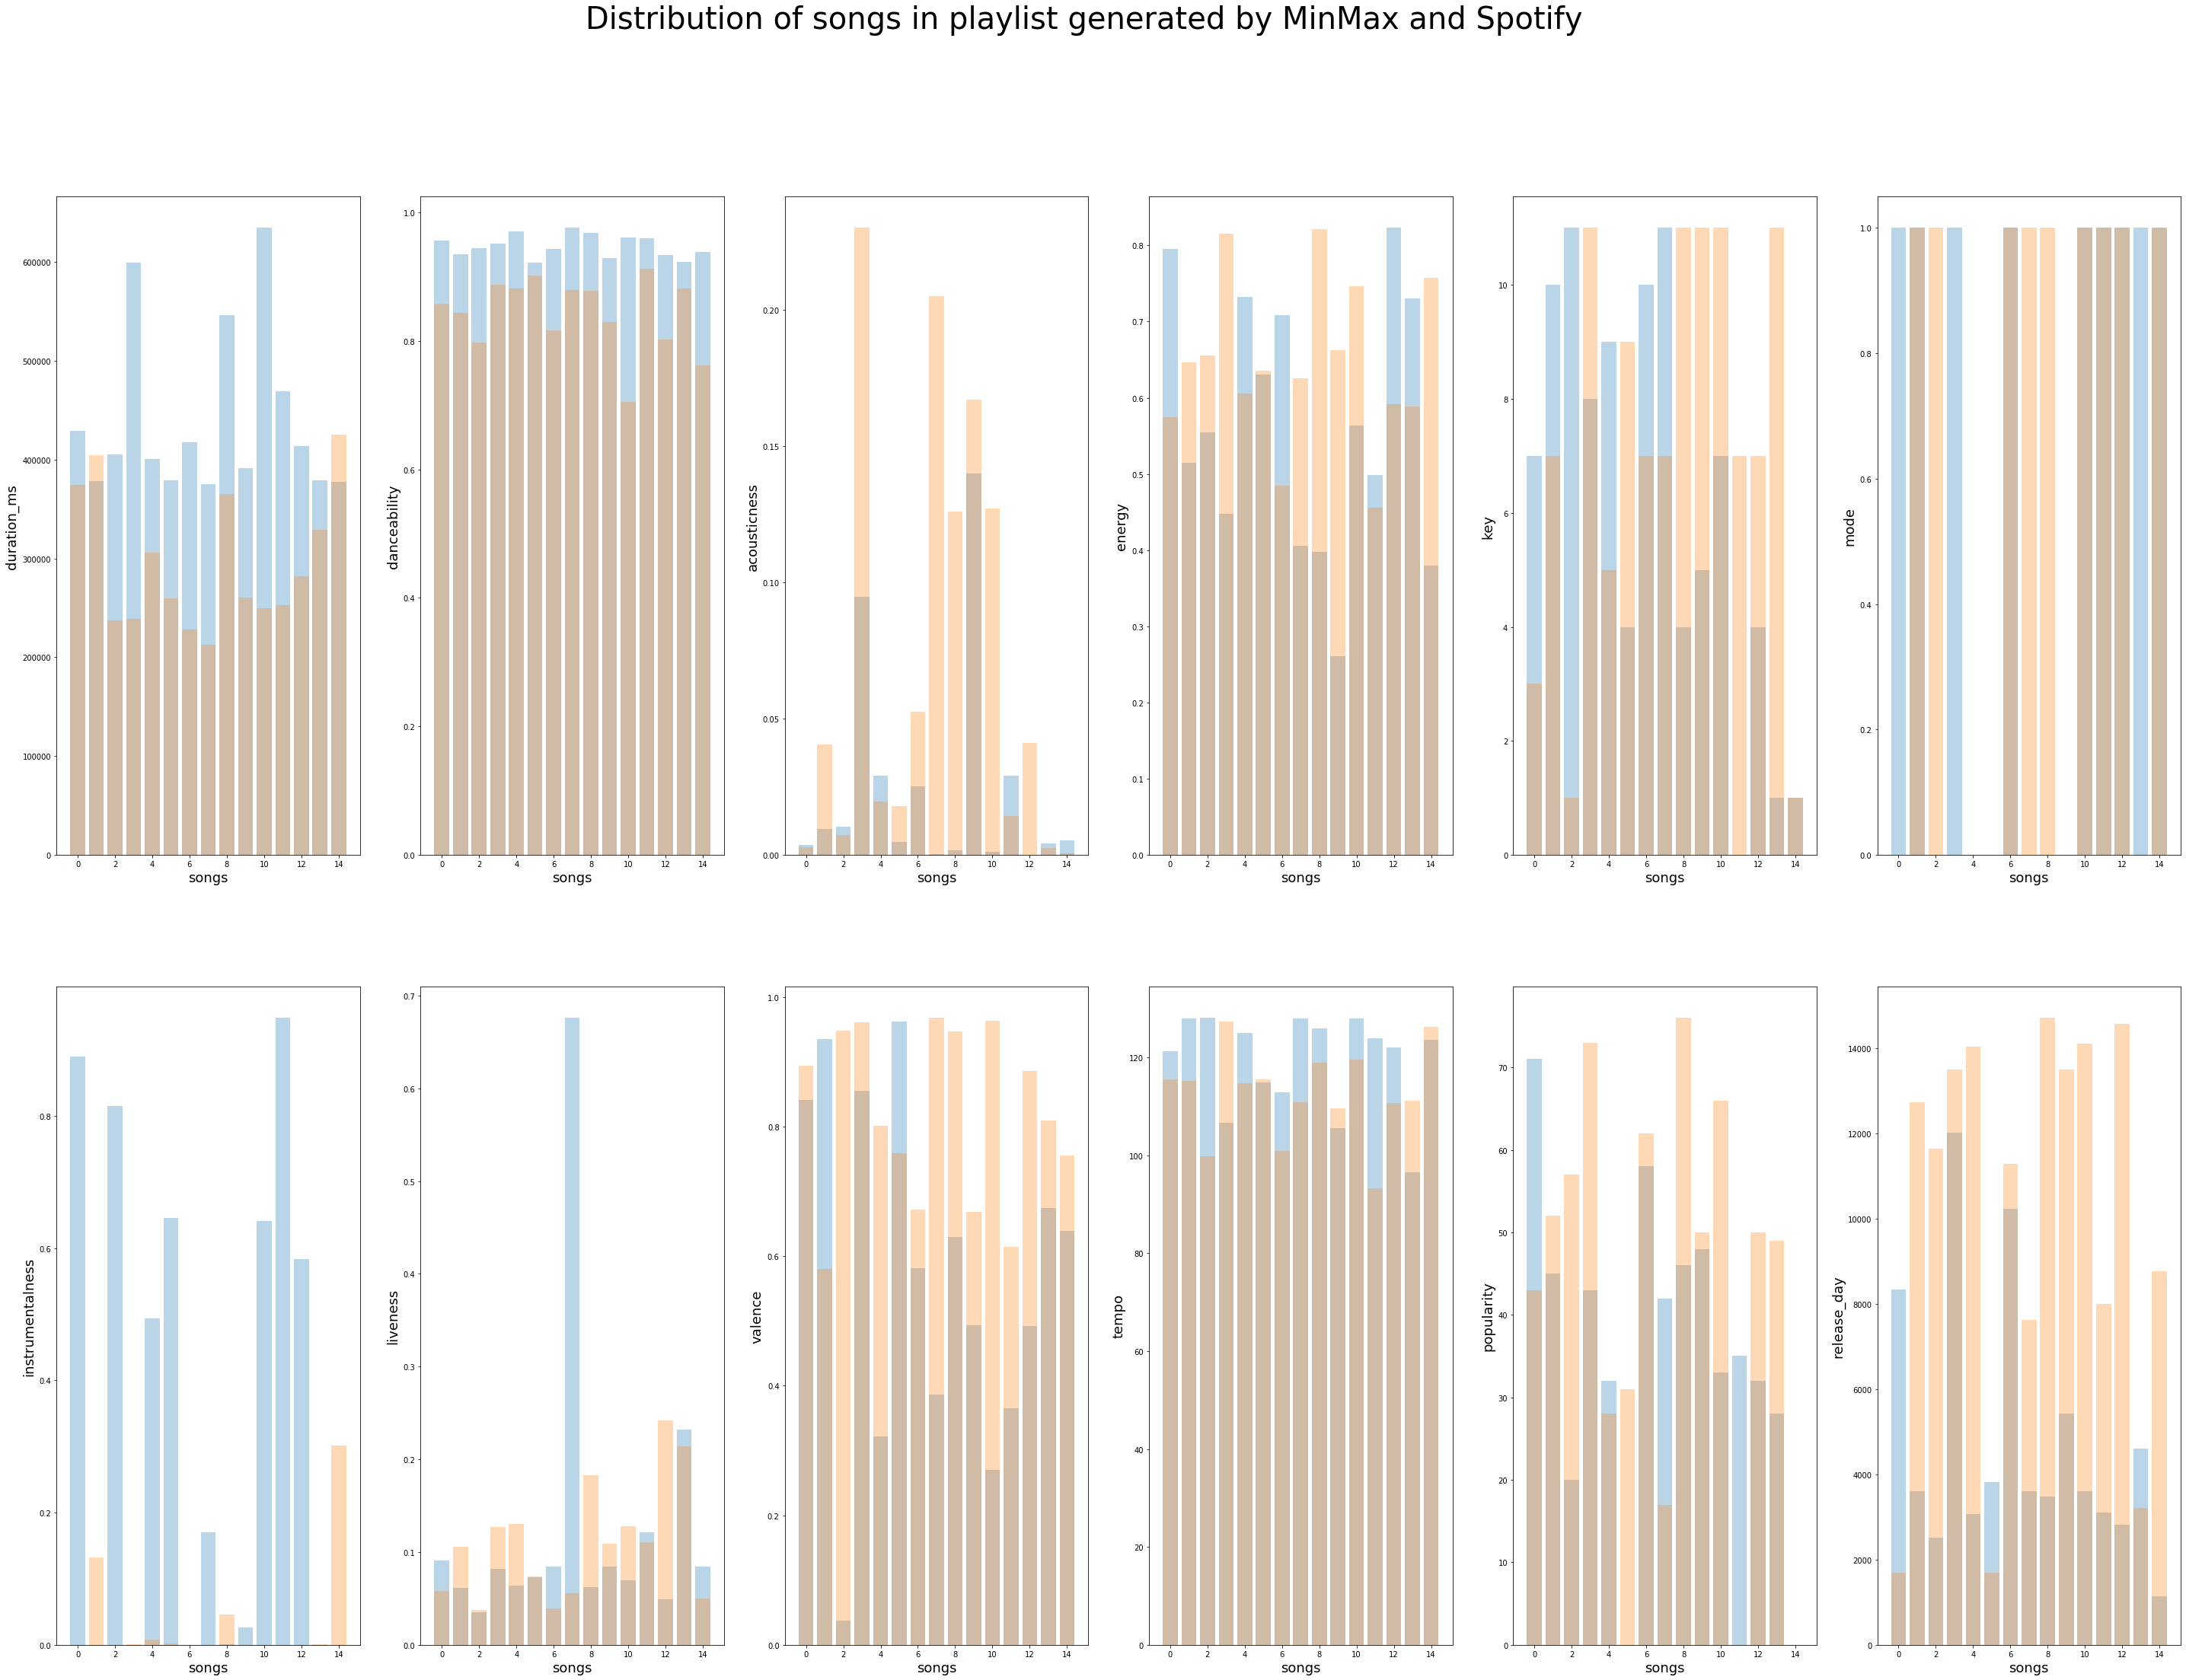

In [53]:
j, k = 0, 0
n, m = 2, int(len(my_playlist)/2)

fig, ax = plt.subplots(n, m, figsize=(50,35))
fig.suptitle("Distribution of songs in playlist generated by MinMax and Spotify", fontsize=40)

for i in range(len(params)):
    ax[j, k].bar(np.arange(len(my_playlist[i])), my_playlist[i], label="minmax", alpha=0.3)
    ax[j, k].bar(np.arange(len(spotify_playlist[i])), spotify_playlist[i], label="spotify", alpha=0.3)
    ax[j, k].set_xlabel("songs", fontsize=18)
    ax[j, k].set_ylabel(params[i], fontsize=18)
    
    k += 1
    if k == m:
        k = 0
        j += 1

fig.savefig("figures/feature_distribution.png")

In [42]:
len(my_playlist[0])

15